### For the use of all luxpy functions used here see:
### https://github.com/ksmet1977/luxpy 
### Tutorial: https://doi.org/10.1080/15502724.2018.1518717 

# Some short evalautions for $f_{1}^{'}$ in a more general form

In [1]:
# Use some packages
import luxpy as lx
from luxpy.utils import getdata
import numpy as np
from matplotlib import pyplot
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import empir19nrm02
from empir19nrm02 import _RES, _SPD
from empir19nrm02.f1prime import py_f1PrimeGlx, py_f1Prime, py_f1PrimeG

In [3]:
# Help with some functions to avoid duplications
def plotSelectedSPD( SPD, iNumber, title='Selected SPD', fileName=None):
    pyplot.plot(SPD[0,:], SPD[iNumber,:])
    pyplot.xlabel('$\lambda$ / nm')
    pyplot.ylabel('SPD / A.U.')
    pyplot.title(title)
    if fileName != None: pyplot.savefig(fileName)
    
def plotYxy( Yxy, title='xy-plot', fileName=None):
    pyplot.plot(Yxy[:,1], Yxy[:,2], '*')
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.title(title)
    if fileName != None: pyplot.savefig(fileName)
    
def plotHist( data, xLabel='x', yLabel='y', title='title', fileName=None):
    pyplot.hist(data)
    pyplot.xlabel(xLabel)
    pyplot.ylabel(yLabel)
    pyplot.title(title)
    if fileName != None: pyplot.savefig(fileName)
        

## Read some detecotr data (colloection of about 120 Photometers, mainly from Bp and used for CIE S 025)
### the first detector is an ideal $V(\lambda)$ Detector, $\lambda$=380(5)780nm
### General: every entry (spectral responsivity, SPD is a row in the matrix, the first row is containing the wavelength scale) 

In [4]:
#vldetectors = getdata('..\data\VL_Detectors.csv',sep=';',kind='np').T
vldetectors = _RES['VLDetectors']['S']['data'].copy()

### About 120 detectors in 5nm steps (this is enough for our purpouse)

In [5]:
vldetectors.shape

(128, 81)

### Two functions for the evaluation from the luxpy package

In [6]:
?lx.spectral_mismatch_and_uncertainty.f1prime

In [7]:
?lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors

### Get some statistical data from the detectors

### Get all f1p values (standard evaluaton, weighting with illuminant A, target function $V(\lambda)$)

In [8]:
f1p=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)

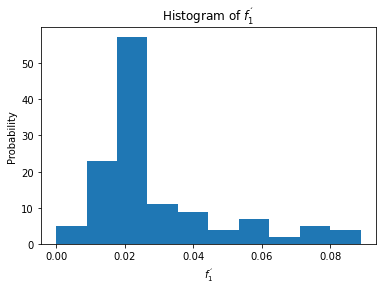

In [9]:
plotHist( f1p, xLabel='$f_{1}^{´}$', yLabel='Probability', title='Histogram of $f_{1}^{´}$', fileName='Histogram of f1Prime.png')

### Sort the detectors on their $f_{1}^{'}$ values to make the visualization easier

In [10]:
vldetectors[1:]=vldetectors[np.argsort(f1p)+1]
f1p=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)

### Get all f1pLED values (standard evaluaton, weighting with illuminant LED_B3/L41, target function $V(\lambda)$)

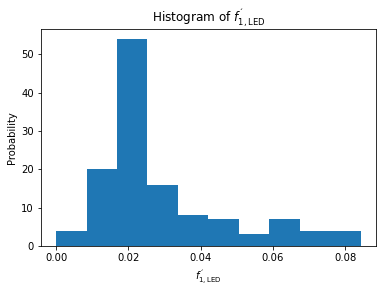

In [11]:
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
plotHist( f1pLED, xLabel='$f_{1,\mathrm{LED}}^{´}$', yLabel='Probability', title='Histogram of $f_{1,\mathrm{LED}}^{´}$', fileName='Histogram of f1PrimeLED.png')

### Let's have a look for the differences $f_{1}^{´}$-$f_{1,\mathrm{LED}}^{´}$ and  $f_{1}^{´}$-$f_{1}^{*}$ over $f_{1}^{´}$
### BTW:  $f_{1}^{*}$ is using the weighting with Standard illuminant E (no weighting at all)

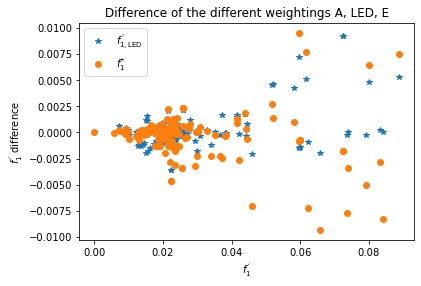

In [12]:
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='E', cieobs='1931_2', s_target_index=2)
pyplot.plot(f1p, f1p-f1pLED, '*', label='$f_{1,\mathrm{LED}}^{´}$')
pyplot.plot(f1p, f1p-f1pE, 'o', label='$f_{1}^{*}$')
pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$f_{1}^{´}$ difference')
pyplot.title('Difference of the different weightings A, LED, E')
pyplot.legend()
pyplot.savefig('Difference of the different weightings A LED E.png')

## Introduce some light source data for evaluation

### Blackbody data with different color temperatures

In [13]:
#SPD_BB=getdata('..\data\SPD_BB.csv',sep=';',kind='np').T
SPD_BB = _SPD['BB']['S']['data'].copy()
SPD_BB.shape

(56, 81)

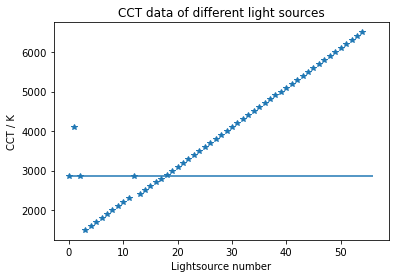

In [14]:
pyplot.plot(lx.xyz_to_cct(lx.spd_to_xyz(SPD_BB)), "*")
pyplot.xlabel('Lightsource number')
pyplot.ylabel('CCT / K')
pyplot.hlines(2856, 0, SPD_BB.shape[0])
pyplot.title('CCT data of different light sources')
pyplot.savefig('SPD_BB_CCT.png')

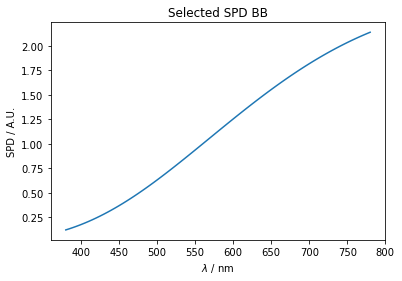

In [15]:
plotSelectedSPD( SPD_BB, 20, title='Selected SPD BB', fileName='SPD_BB_Selected.png')

### Some PT White LED Spectra (mainly from the S 025 calculations)

In [16]:
#SPD_PTLED=getdata('..\data\SPD_PT_LED_White.csv',sep=';',kind='np').T
SPD_PTLED = _SPD['PTLED']['S']['data'].copy()
SPD_PTLED.shape

(230, 81)

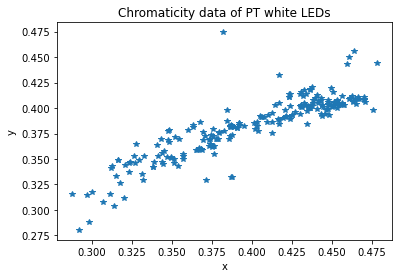

In [17]:
Yxy=lx.xyz_to_Yxy(lx.spd_to_xyz(SPD_PTLED))
plotYxy( Yxy, title='Chromaticity data of PT white LEDs', fileName='SPD_PTLED_xy.png')

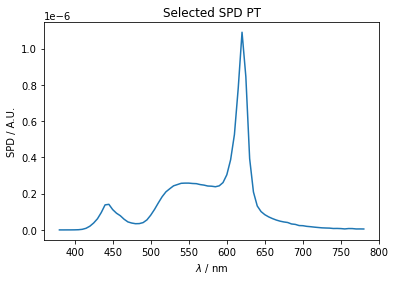

In [18]:
plotSelectedSPD( SPD_PTLED, 20, title='Selected SPD PT', fileName='SPD_PTLED_Selected.png')

### Some RGB White LED Spectra (mainly from the S 025 calculations)¶

In [19]:
#SPD_RGB=getdata('..\data\SPD_RGB_LED_White.csv',sep=';',kind='np').T
SPD_RGB = _SPD['RGBLED']['S']['data'].copy()
SPD_RGB.shape

(99, 81)

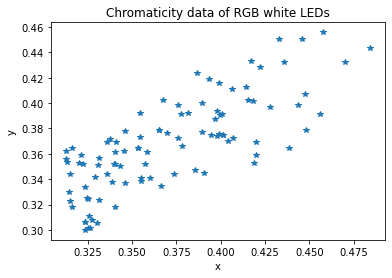

In [20]:
Yxy=lx.xyz_to_Yxy(lx.spd_to_xyz(SPD_RGB))
plotYxy( Yxy, title='Chromaticity data of RGB white LEDs', fileName='SPD_RGB_xy.png')

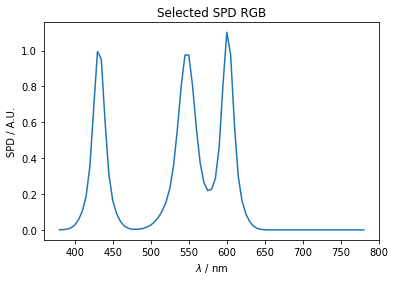

In [21]:
plotSelectedSPD( SPD_RGB, 20, title='Selected SPD RGB', fileName='SPD_RGB_Selected.png')

### Some Monochromatic LED Spectra¶

In [22]:
#SPD_Mono=getdata('..\data\SPD_LED_Mono.csv',sep=';',kind='np').T
SPD_Mono = _SPD['MONOLED']['S']['data'].copy()
SPD_Mono.shape

(542, 401)

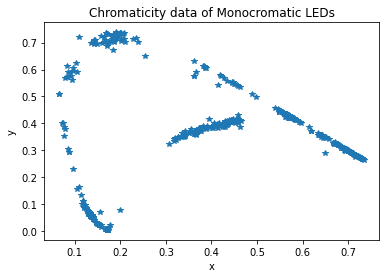

In [23]:
Yxy=lx.xyz_to_Yxy(lx.spd_to_xyz(SPD_Mono))
plotYxy( Yxy, title='Chromaticity data of Monocromatic LEDs', fileName='SPD_MonoLEDs_xy.png')

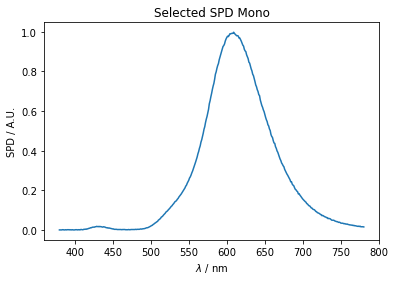

In [24]:
plotSelectedSPD( SPD_Mono, 260, title='Selected SPD Mono', fileName='SPD_Mono_Selected.png')

### Combine the spectral data
### (note: the first row contains the wavelength scale and is droped expect for the first data set)

In [25]:
spectra=np.vstack((SPD_BB, SPD_PTLED[1:], SPD_RGB[1:]))
#Without the Mono LEDs (to be handled later on)
#spectra=SPD_Mono
SMCF=lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors( spectra, vldetectors, S_C='A')
SMCFLED=lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors( spectra, vldetectors, S_C='LED_B3')

In [26]:
print (spectra.shape)
print (SMCF.shape)

(383, 81)
(382, 127)


### The SMCF is an image now. (one column for each detector, one row for each SPD)

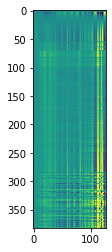

In [27]:
pyplot.imshow(SMCF, vmin=0.97, vmax=1.03)

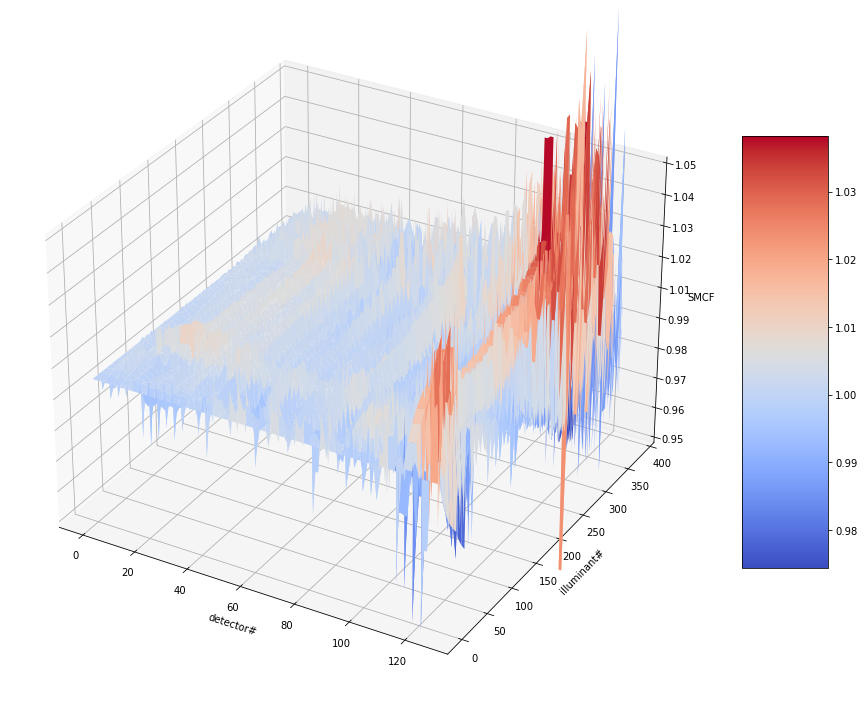

In [28]:
X = np.arange(0, vldetectors.shape[0]-1, 1)
Y = np.arange(0, spectra.shape[0]-1, 1)
X, Y = np.meshgrid(X, Y)
fig = pyplot.figure(figsize=[12, 12])
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, SMCF,cmap=cm.coolwarm)
# Customize the z axis.
ax.set_zlim(0.95, 1.05)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('detector#')
ax.set_ylabel('illuminant#')
ax.set_zlabel('SMCF')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.show
pyplot.savefig('SMCF_Detector_f1Prime.png')

In [29]:
f1pA=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='E', cieobs='1931_2', s_target_index=2)
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
f1pA_py=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=0.)
f1pAFMin=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=1, dCutOff=0., dBandWidth=0.)
f1pAFCutOffR=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=-0.01, dBandWidth=0.)
f1pBW20nm=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=20.)
f1pEval = np.vstack(( f1pA, f1pE, f1pLED, f1pAFMin, f1pAFCutOffR, f1pBW20nm))
f1pEvalCorr = np.corrcoef(f1pEval)

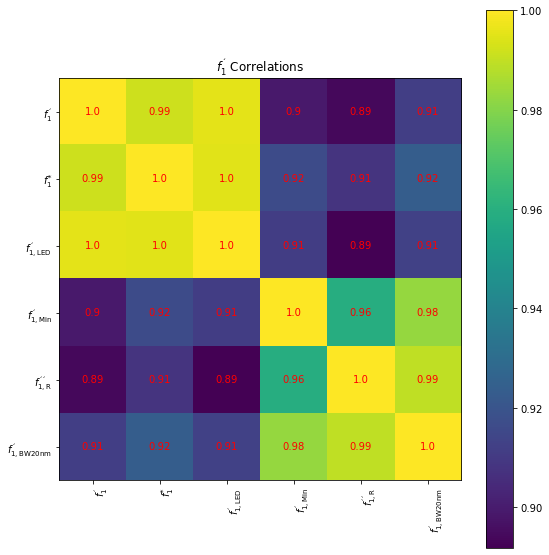

In [30]:
fig, ax = pyplot.subplots(figsize=(8,8))
im = ax.imshow(f1pEvalCorr)
fig.colorbar(im)
x_label_list = ['$f_{1}^{´}$', '$f_{1}^{*}$', '$f_{1,\mathrm{LED}}^{´}$', '$f_{1,\mathrm{Min}}^{´}$', '$f_{1,\mathrm{R}}^{´´}$', '$f_{1,\mathrm{BW20nm}}^{´}$']
ax.set_xticks(np.arange(len(x_label_list)))
ax.set_yticks(np.arange(len(x_label_list)))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(x_label_list)

pyplot.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(x_label_list)):
    for j in range(len(x_label_list)):
        text = ax.text(j, i, round(f1pEvalCorr[i, j],2),
                       ha="center", va="center", color="r")

ax.set_title('$f_{1}^{´}$ Correlations')
fig.tight_layout()
pyplot.savefig('f1p Correlations.png')

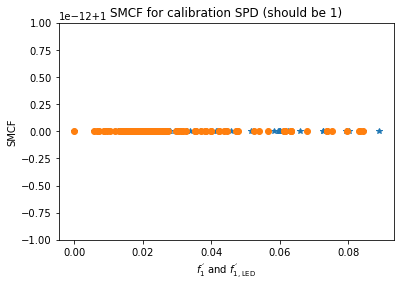

In [31]:
# 0 Illuminant A
# 1 Illuminant LED
pyplot.plot(f1pA, SMCF[0,:], '*')
pyplot.plot(f1pLED, SMCFLED[1,:], 'o')
pyplot.xlabel('$f_{1}^{´}$ and $f_{1,\mathrm{LED}}^{´}$')
pyplot.ylabel('SMCF')
pyplot.title('SMCF for calibration SPD (should be 1)')
pyplot.savefig('calibation check.png')

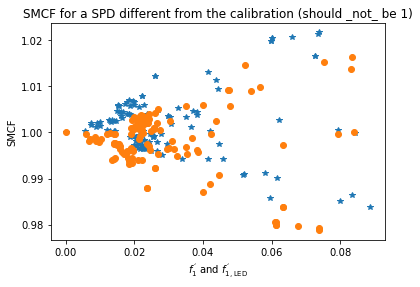

In [32]:
# 0 Illuminant A
# 1 Illuminant LED
# Attention: Here the LED is used for the calibration with A and vice versa
pyplot.plot(f1pA, SMCF[1,:], '*')
pyplot.plot(f1pLED, SMCFLED[0,:], 'o')
pyplot.xlabel('$f_{1}^{´}$ and $f_{1,\mathrm{LED}}^{´}$')
pyplot.ylabel('SMCF')
pyplot.title('SMCF for a SPD different from the calibration (should _not_ be 1)')
pyplot.savefig('check A LED reverse.png')

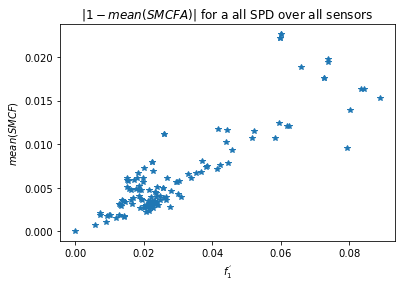

In [33]:
meanA0=np.mean(abs(SMCF-1), axis=0)
pyplot.plot(f1pA, meanA0, '*')

pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$mean(SMCF)$')
pyplot.title('$|1-mean(SMCFA)|$ for a all SPD over all sensors')
pyplot.savefig('f1Prime_mean_SMCFA.png')

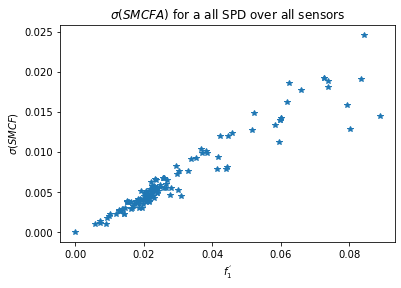

In [34]:
stdA0=np.std(SMCF, axis=0)
pyplot.plot(f1pA, stdA0, '*')

pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$\sigma(SMCF)$')
pyplot.title('$\sigma(SMCFA)$ for a all SPD over all sensors')
pyplot.savefig('f1Prime_sigma_SMCFA.png')

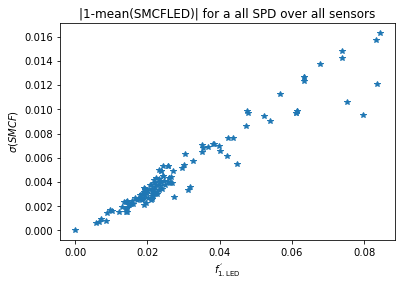

In [35]:
meanLED=np.mean(abs(SMCFLED-1), axis=0)
pyplot.plot(f1pLED, meanLED, '*')

pyplot.xlabel('$f_{1.\mathrm{LED}}^{´}$')
pyplot.ylabel('$\sigma(SMCF)$')
pyplot.title('|1-mean(SMCFLED)| for a all SPD over all sensors')
pyplot.savefig('f1Prime_mean_SMCFLED.png')

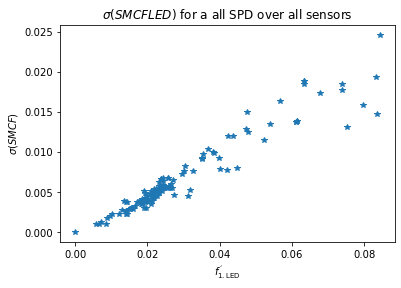

In [36]:
stdLED=np.std(SMCFLED, axis=0)
pyplot.plot(f1pLED, stdLED, '*')

pyplot.xlabel('$f_{1.\mathrm{LED}}^{´}$')
pyplot.ylabel('$\sigma(SMCF)$')
pyplot.title('$\sigma(SMCFLED)$ for a all SPD over all sensors')
pyplot.savefig('f1Prime_sigma_SMCFLED.png')

In [37]:
f1pEval2 = np.vstack(( f1pA, f1pE, f1pLED, f1pAFMin, f1pAFCutOffR, f1pBW20nm, meanA0, stdA0, meanLED, stdLED))
f1pEvalCorr2 = np.corrcoef(f1pEval2)
x_label_list = ['$f_{1}^{´}$', '$f_{1}^{*}$', '$f_{1,\mathrm{LED}}^{´}$', '$f_{1,\mathrm{Min}}^{´}$', '$f_{1,\mathrm{R}}^{´´}$', '$f_{1,\mathrm{BW20nm}}^{´}$', \
               'SMCFA', '$\sigma(SMCFA)$', 'SMCFLED', '$\sigma(SMCFLED)$']

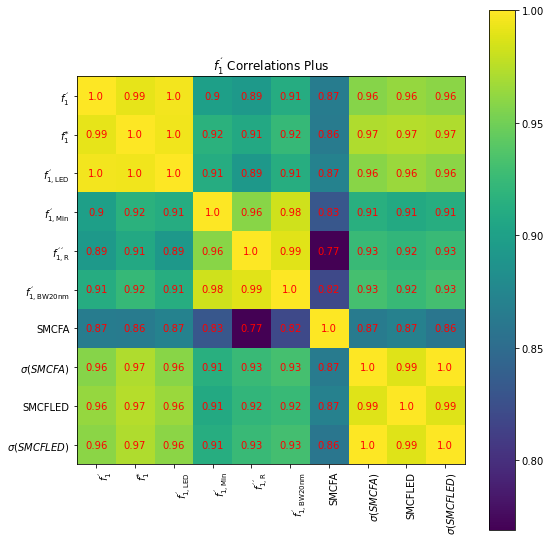

In [38]:
fig, ax = pyplot.subplots(figsize=(8,8))
im = ax.imshow(f1pEvalCorr2)
fig.colorbar(im)
ax.set_xticks(np.arange(len(x_label_list)))
ax.set_yticks(np.arange(len(x_label_list)))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(x_label_list)

pyplot.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(x_label_list)):
    for j in range(len(x_label_list)):
        text = ax.text(j, i, round(f1pEvalCorr2[i, j],2),
                       ha="center", va="center", color="r")

ax.set_title('$f_{1}^{´}$ Correlations Plus')
fig.tight_layout()
pyplot.savefig('f1p Correlations2.png')


(83, 81)

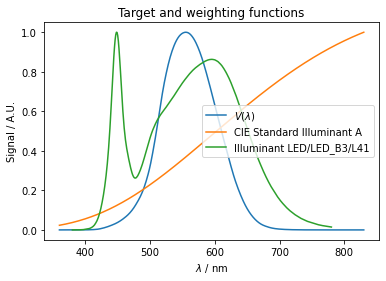

In [39]:
pyplot.plot(lx._CMF['1931_2']['bar'][0], lx._CMF['1931_2']['bar'][2], label='$V(\lambda)$')
pyplot.plot(lx._CIE_ILLUMINANTS['A'][0], lx._CIE_ILLUMINANTS['A'][1]/np.max(lx._CIE_ILLUMINANTS['A'][1]), label='CIE Standard Illuminant A')
pyplot.plot(lx._CIE_ILLUMINANTS['LED_B3'][0], lx._CIE_ILLUMINANTS['LED_B3'][1]/np.max(lx._CIE_ILLUMINANTS['LED_B3'][1]), label='Illuminant LED/LED_B3/L41')

pyplot.xlabel('$\lambda$ / nm')
pyplot.ylabel('Signal / A.U.')
pyplot.title('Target and weighting functions')
pyplot.legend()
pyplot.savefig('Target and weighting.png')

#VLDetectorNoise=getdata('..\data\VL_DetectorsVLPlusNoise.csv',sep=';',kind='np').T
VLDetectorNoise = _RES['VLSimNoise']['S']['data'].copy()
VLDetectorNoise.shape

In [40]:
f1pA=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='A', cieobs='1931_2', s_target_index=2)
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='E', cieobs='1931_2', s_target_index=2)
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
f1pA_py=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=0.)
f1pAFMin=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=1, dCutOff=0., dBandWidth=0.)
f1pAFCutOffR=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=-0.01, dBandWidth=0.)
f1pBW20nm=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=20.)

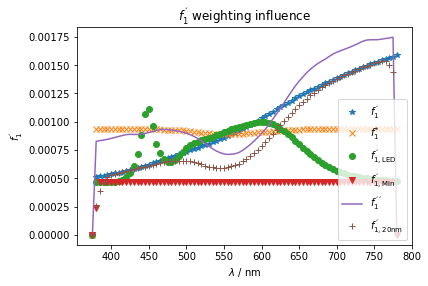

In [41]:
xRange = np.arange(375,780+1,5)
pyplot.plot(xRange, f1pA, '*', label='$f_{1}^{´}$')
pyplot.plot(xRange, f1pE, 'x', label='$f_{1}^{*}$')
pyplot.plot(xRange, f1pLED, 'o', label='$f_{1,\mathrm{LED}}^{´}$')
#pyplot.plot(xRange, f1pA-f1pA_py, 'ro', label='$f_{1,\mathrm{lx}}^{´}-f_{1,\mathrm{py}}^{´}$')
pyplot.plot(xRange, f1pAFMin, 'v', label='$f_{1,\mathrm{Min}}^{´}$')
pyplot.plot(xRange, f1pAFCutOffR, '-', label='$f_{1}^{´´}$')
pyplot.plot(xRange, f1pBW20nm, '+', label='$f_{1,\mathrm{20nm}}^{´}$')

pyplot.xlabel('$\lambda$ / nm')
pyplot.ylabel('$f_{1}^{´}$')
pyplot.title('$f_{1}^{´}$ weighting influence')
pyplot.legend()
pyplot.savefig('weighting influence.png')

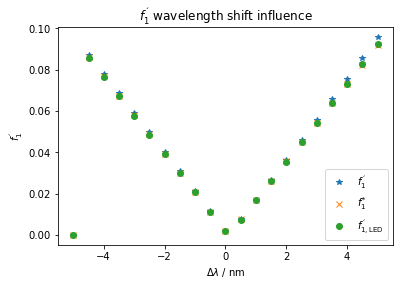

In [42]:
#VLDetectorShift=getdata('..\data\VL_DetectorsVLShift.csv',sep=';',kind='np').T
VLDetectorShift = _RES['VLSimShift']['S']['data'].copy()

f1pA=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='A', cieobs='1931_2', s_target_index=2)
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='E', cieobs='1931_2', s_target_index=2)
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='LED_B3', cieobs='1931_2', s_target_index=2)

xRange = np.arange(-5,5+0.2,0.1)
subPlot = 5
pyplot.plot(xRange[::subPlot], f1pA[::subPlot], '*', label='$f_{1}^{´}$')
pyplot.plot(xRange[::subPlot], f1pE[::subPlot], 'x', label='$f_{1}^{*}$')
pyplot.plot(xRange[::subPlot], f1pLED[::subPlot], 'o', label='$f_{1,\mathrm{LED}}^{´}$')

pyplot.xlabel('$\Delta\lambda$ / nm')
pyplot.ylabel('$f_{1}^{´}$')
pyplot.title('$f_{1}^{´}$ wavelength shift influence')
pyplot.legend()
pyplot.savefig('f1Prime_Sens_WLShift.png')

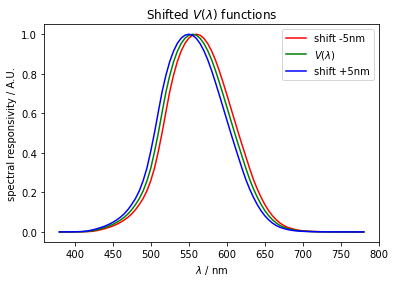

In [43]:
VLDetectorNumber = VLDetectorShift.shape[0]
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[2,:], 'r-', label='shift -5nm')
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[int((VLDetectorNumber-1)/2),:], 'g-', label='$V(\lambda)$')
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[VLDetectorNumber-1,:], 'b-', label='shift +5nm')
pyplot.xlabel('$\lambda$ / nm')
pyplot.ylabel('spectral responsivity / A.U.')
pyplot.title('Shifted $V(\lambda$) functions')
pyplot.legend()
pyplot.savefig('VLShifts.png')
    

# Ende Gelände